**Customer Segmentation for E-commerce**: Segment customers based on their purchasing behavior to identify high-value customers for targeted marketing campaigns.

**Procedure**: Apply K-means clustering on customer transaction data, considering features such as purchase frequency, total spent, and product categories.

**Domain**: E-commerce

**Dataset Link**: https://www.kaggle.com/carrie1/ecommerce-data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [32]:
#loading the dataset
df = pd.read_csv('/content/data.csv', encoding='latin-1')
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# Display information about the DataFrame
print("\nInformation about the dataset:")
print(df.info())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(df.describe())

# Descriptive statistics for object-type columns
object_describe = df.select_dtypes(include=['object']).describe()

print("\nDescriptive statistics of object-type columns:")
print(object_describe)


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

Summary statistics of numerical columns:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         

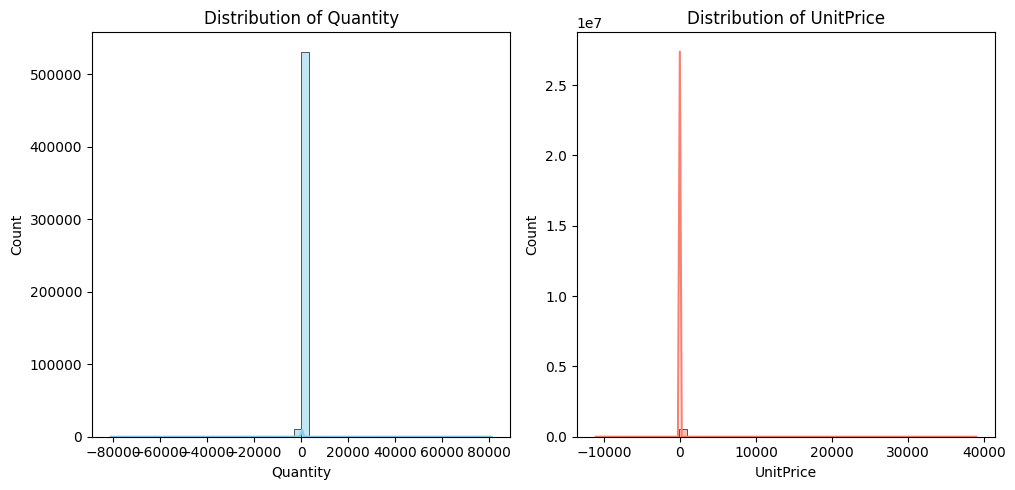

In [ ]:
# Visualize the distribution of numerical features using histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Quantity'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Quantity')

plt.subplot(1, 3, 2)
sns.histplot(df['UnitPrice'], bins=50, kde=True, color='salmon')
plt.title('Distribution of UnitPrice')

plt.tight_layout()
plt.show()


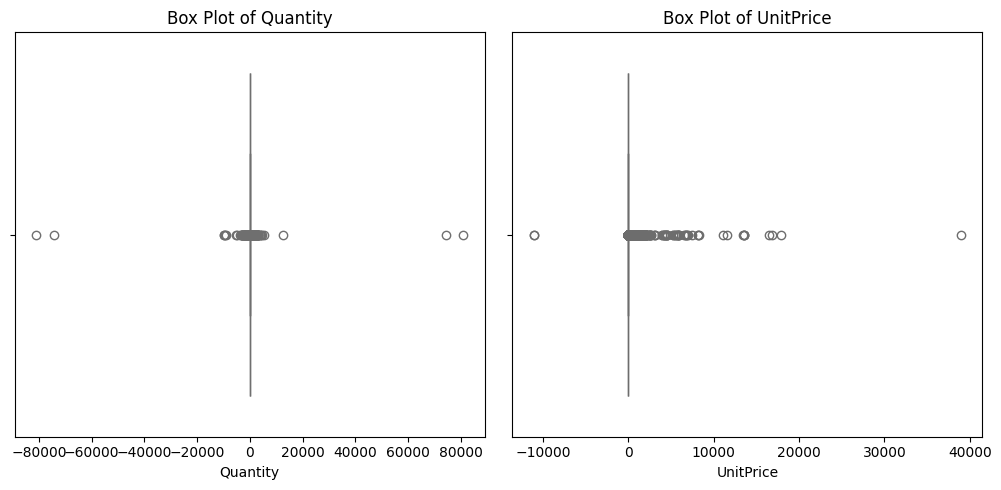

In [ ]:

# Visualize outliers and spread of numerical features using box plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['Quantity'], color='skyblue')
plt.title('Box Plot of Quantity')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['UnitPrice'], color='salmon')
plt.title('Box Plot of UnitPrice')

plt.tight_layout()
plt.show()

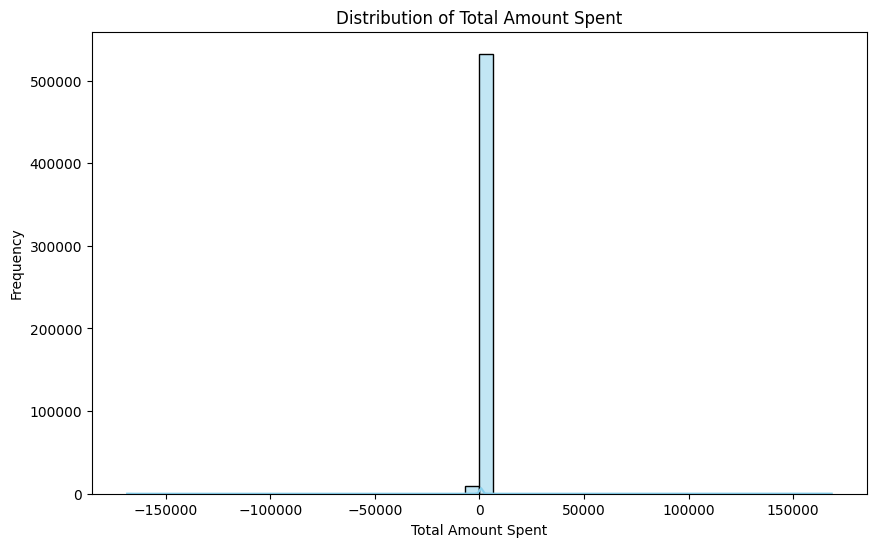

In [ ]:
# Create a new feature representing total amount spent for each transaction
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Visualize the distribution of total amount spent using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalAmount'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Total Amount Spent')
plt.xlabel('Total Amount Spent')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()

# Check for null values in each column
null_count = df.isnull().sum()

print("Number of duplicate rows:", duplicate_count)
print("\nNumber of null values in each column:",null_count)



Number of duplicate rows: 5268

Number of null values in each column: InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalAmount         0
dtype: int64


In [ ]:
# Remove duplicate rows from the dataset
df_cleaned = df.drop_duplicates()

# Verify the number of rows after removing duplicates
print("Number of rows after removing duplicates:", len(df_cleaned))


Number of rows after removing duplicates: 536641


In [ ]:
# Remove rows with null values in the 'Description' column
df_cleaned = df_cleaned.dropna(subset=['Description'])

# Remove rows with null values in the 'CustomerID' column
df_cleaned = df_cleaned.dropna(subset=['CustomerID'])

# Verify the number of null values after cleaning
print("Number of null values after cleaning:")
print(df_cleaned.isnull().sum())


Number of null values after cleaning:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalAmount    0
dtype: int64


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
 8   TotalAmount  401604 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 30.6+ MB


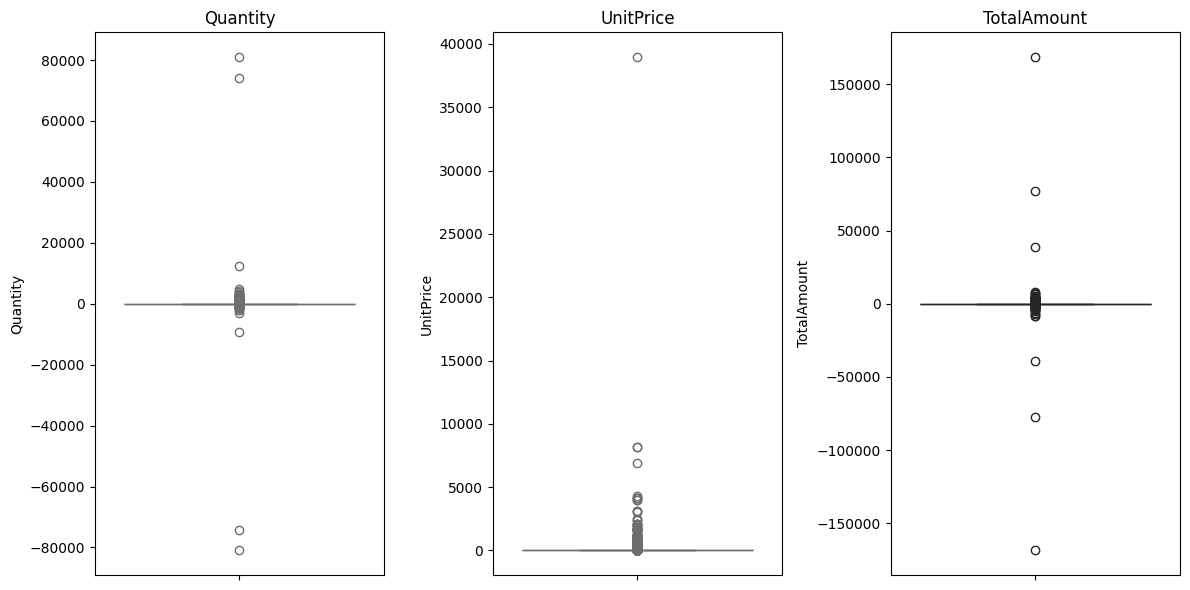

In [ ]:
# Visualize outliers before removing them
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y='Quantity', data=df_cleaned, color='skyblue')
plt.title('Quantity')

plt.subplot(1, 3, 2)
sns.boxplot(y='UnitPrice', data=df_cleaned, color='salmon')
plt.title('UnitPrice')

plt.subplot(1, 3, 3)
sns.boxplot(y='TotalAmount', data=df_cleaned, color='green')
plt.title('TotalAmount')

plt.tight_layout()
plt.show()


In [ ]:
# Calculate IQR for Quantity, UnitPrice, and TotalAmount
Q1 = df_cleaned[['Quantity', 'UnitPrice', 'TotalAmount']].quantile(0.25)
Q3 = df_cleaned[['Quantity', 'UnitPrice', 'TotalAmount']].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers
threshold = 1.5

# Identify outliers using IQR method
outliers = ((df_cleaned[['Quantity', 'UnitPrice', 'TotalAmount']] < (Q1 - threshold * IQR)) | (df_cleaned[['Quantity', 'UnitPrice', 'TotalAmount']] > (Q3 + threshold * IQR))).any(axis=1)

# Remove outliers from the dataset
df_cleaned = df_cleaned[~outliers]

# Verify the number of rows after removing outliers
print("Number of rows after removing outliers:", len(df_cleaned))


Number of rows after removing outliers: 329579


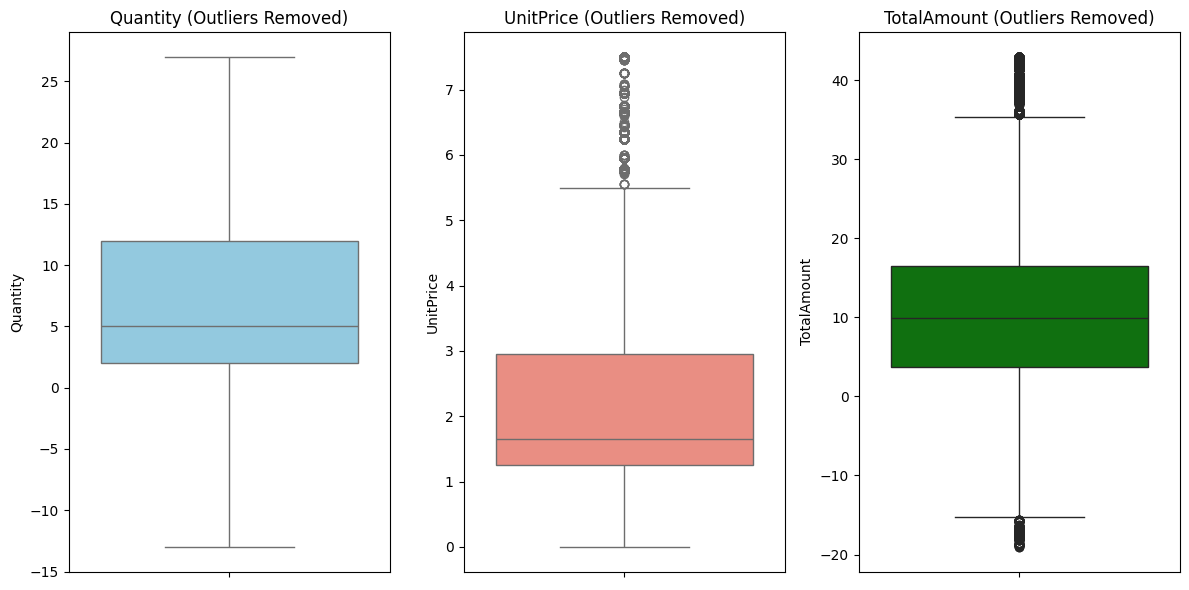

In [ ]:
# Visualize outliers after removing them
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y='Quantity', data=df_cleaned, color='skyblue')
plt.title('Quantity (Outliers Removed)')

plt.subplot(1, 3, 2)
sns.boxplot(y='UnitPrice', data=df_cleaned, color='salmon')
plt.title('UnitPrice (Outliers Removed)')

plt.subplot(1, 3, 3)
sns.boxplot(y='TotalAmount', data=df_cleaned, color='green')
plt.title('TotalAmount (Outliers Removed)')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

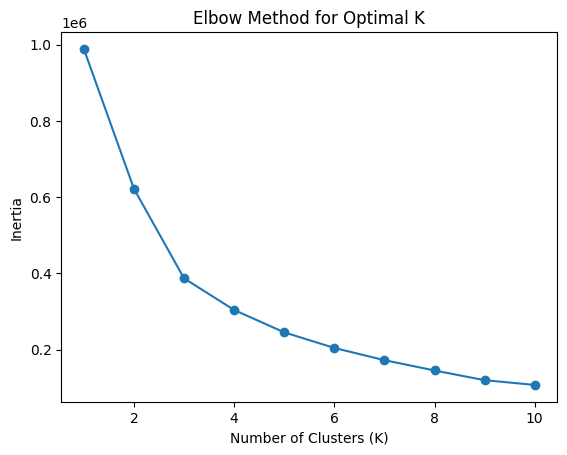

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
X = df_cleaned[['Quantity', 'UnitPrice', 'TotalAmount']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


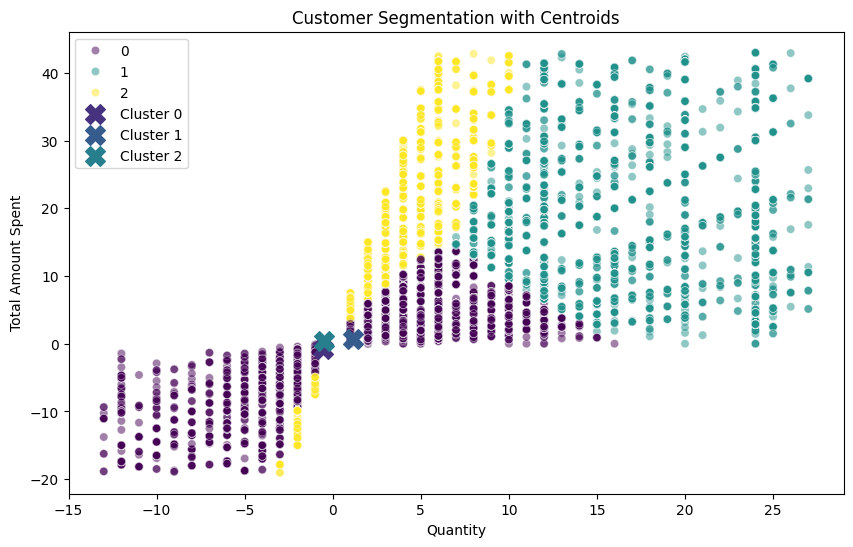

In [29]:

# Determine the optimal number of clusters using the elbow method
optimal_k = 3  # Assuming optimal number of clusters is 3 (based on elbow method)

# Fit K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataset
df_cleaned['Cluster'] = kmeans.labels_

# Get centroids of the clusters
centroids = kmeans.cluster_centers_

# Visualize the segmentation results with centroids
plt.figure(figsize=(10, 6))

# Scatter plot of data points
sns.scatterplot(x='Quantity', y='TotalAmount', hue='Cluster', data=df_cleaned, palette='viridis', alpha=0.5)

# Plot centroids with corresponding colors
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[2], marker='X', s=200, color=sns.color_palette('viridis')[i], label=f'Cluster {i}')

plt.title('Customer Segmentation with Centroids')
plt.xlabel('Quantity')
plt.ylabel('Total Amount Spent')
plt.legend()
plt.show()


Centroids of the clusters:
   Quantity  UnitPrice  TotalAmount
0 -0.572998  -0.441799    -0.798730
1  1.179003  -0.531820     0.765769
2 -0.509755   1.410785     0.388222

Cluster 2 - Number of Customers: 83688
Summary statistics for each feature:
           Quantity     UnitPrice   TotalAmount
count  83688.000000  83688.000000  83688.000000
mean       3.689071      4.264579     14.540112
std        2.088116      1.153367      7.816865
min       -3.000000      2.400000    -19.050000
25%        2.000000      3.250000      8.500000
50%        4.000000      4.150000     15.000000
75%        6.000000      4.950000     17.700000
max       10.000000      7.500000     42.800000


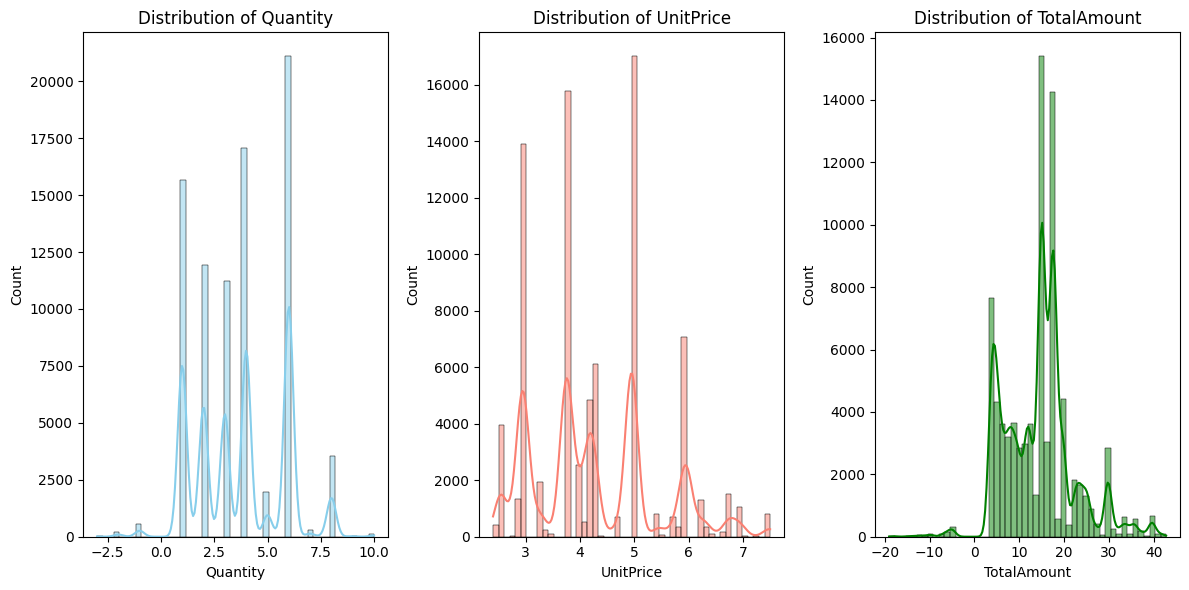


Cluster 0 - Number of Customers: 141122
Summary statistics for each feature:
            Quantity      UnitPrice    TotalAmount
count  141122.000000  141122.000000  141122.000000
mean        3.265678       1.475705       3.805204
std         3.249779       0.780556       3.620272
min       -13.000000       0.000000     -18.900000
25%         1.000000       0.850000       1.650000
50%         2.000000       1.450000       3.250000
75%         5.000000       2.080000       5.780000
max        16.000000       5.450000      13.650000


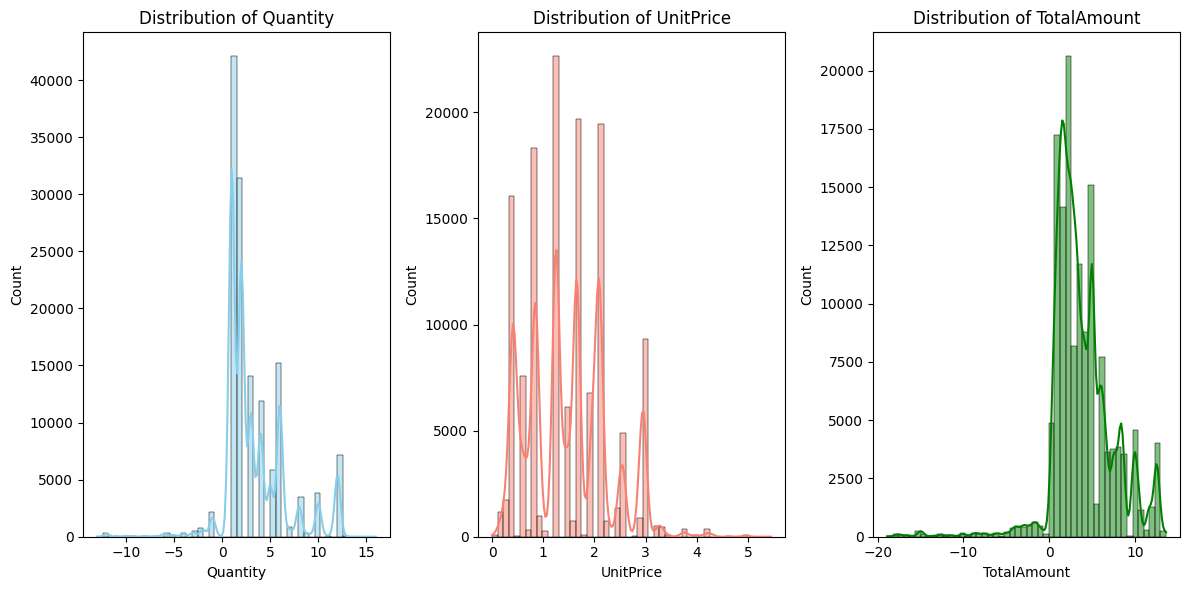


Cluster 1 - Number of Customers: 104769
Summary statistics for each feature:
            Quantity      UnitPrice    TotalAmount
count  104769.000000  104769.000000  104769.000000
mean       14.994779       1.340186      17.954681
std         5.644236       0.637235       7.921288
min         7.000000       0.000000       0.000000
25%        12.000000       0.850000      12.500000
50%        12.000000       1.250000      16.500000
75%        20.000000       1.650000      20.800000
max        27.000000       3.750000      42.960000


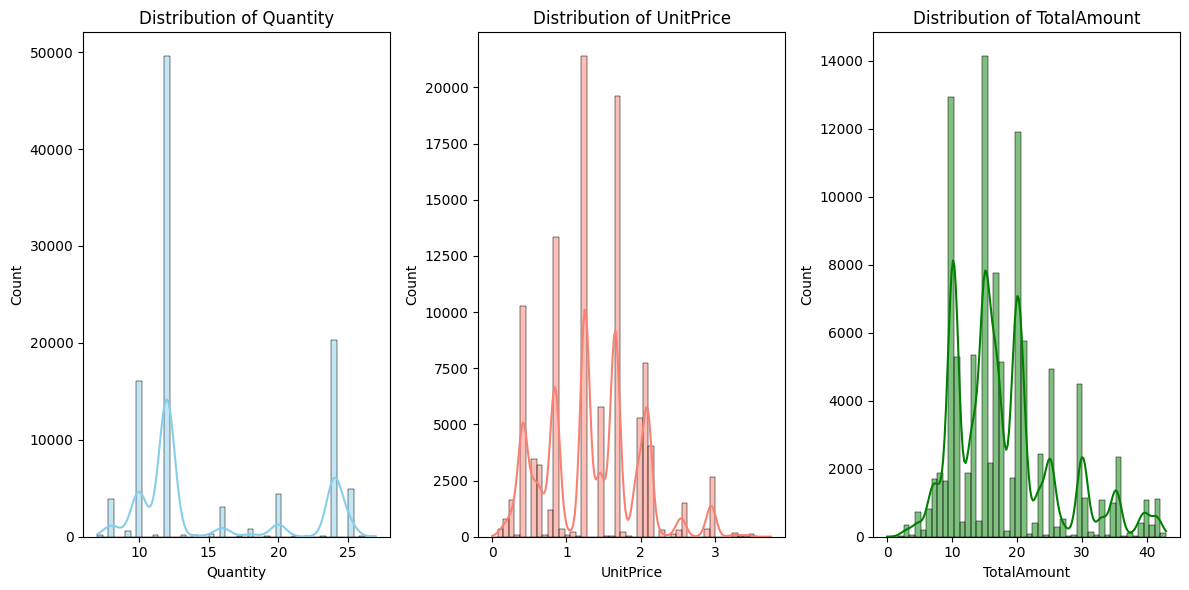

In [30]:
# Calculate centroids of each cluster
centroids_df = pd.DataFrame(centroids, columns=['Quantity', 'UnitPrice', 'TotalAmount'])
print("Centroids of the clusters:")
print(centroids_df)

# Explore the distribution of features within each cluster
for cluster_label in df_cleaned['Cluster'].unique():
    cluster_data = df_cleaned[df_cleaned['Cluster'] == cluster_label]
    print(f"\nCluster {cluster_label} - Number of Customers: {len(cluster_data)}")
    print("Summary statistics for each feature:")
    print(cluster_data[['Quantity', 'UnitPrice', 'TotalAmount']].describe())

    # Visualize feature distributions within each cluster
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    sns.histplot(cluster_data['Quantity'], bins=50, kde=True, color='skyblue')
    plt.title('Distribution of Quantity')

    plt.subplot(1, 3, 2)
    sns.histplot(cluster_data['UnitPrice'], bins=50, kde=True, color='salmon')
    plt.title('Distribution of UnitPrice')

    plt.subplot(1, 3, 3)
    sns.histplot(cluster_data['TotalAmount'], bins=50, kde=True, color='green')
    plt.title('Distribution of TotalAmount')

    plt.tight_layout()
    plt.show()


In [31]:
# Calculate summary statistics for UnitPrice within each cluster
unitprice_stats = df_cleaned.groupby('Cluster')['UnitPrice'].describe()

# Display the summary statistics
print("Summary statistics for UnitPrice within each cluster:")
print(unitprice_stats)


Summary statistics for UnitPrice within each cluster:
            count      mean       std  min   25%   50%   75%   max
Cluster                                                           
0        141122.0  1.475705  0.780556  0.0  0.85  1.45  2.08  5.45
1        104769.0  1.340186  0.637235  0.0  0.85  1.25  1.65  3.75
2         83688.0  4.264579  1.153367  2.4  3.25  4.15  4.95  7.50


##Here's a description of the summary statistics for UnitPrice within each cluster:

#Cluster 0:
Count: 141,122

Mean: $1.48

Standard Deviation: $0.78

Minimum: $0.00

25th Percentile (Q1): $0.85

Median (50th Percentile): $1.45

75th Percentile (Q3): $2.08

Maximum: $5.45

#Cluster 1:
Count: 104,769

Mean: $1.34

Standard Deviation: $0.64

Minimum: $0.00

25th Percentile (Q1): $0.85

Median (50th Percentile): $1.25

75th Percentile (Q3): $1.65

Maximum: $3.75

#Cluster 2:

Count: 83,688

Mean: $4.26

Standard Deviation: $1.15

Minimum: $2.40

25th Percentile (Q1): $3.25

Median (50th Percentile): $4.15

75th Percentile (Q3): $4.95

Maximum: $7.50


#These summary statistics provide insights into the pricing patterns of products purchased by customers in each cluster. For example:
#Customers in Cluster 0 tend to purchase products with lower unit prices, with a mean of 1.48 and a maximum of $5.45.

#Customers in Cluster 2 tend to purchase products with higher unit prices, with a mean of 4.26 and a maximum of $7.50. These insights can be valuable for understanding the purchasing behavior of customers in each cluster and tailoring marketing strategies accordingly.